In [7]:
# importing all the important libraries 

from ultralytics import YOLO
import cv2
import os
import torch 
import matplotlib.pyplot as plt 
import json
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Directiing the all sample video and output 
sample_img = r"C:\Users\acer\cv_assignment\task1_input_video\sample_image.jpg"
video_path = r"C:\Users\acer\cv_assignment\task1_input_video\input_video.mp4"
output = r"C:\Users\acer\cv_assignment\task1_outputs"
annotation = os.path.join(output, "annotated_frames")

In [76]:
# Importing the model and checking the sample image's confidence and class name 

model = YOLO("yolov8n.pt")
results = model(sample_img)
result_list = results[0]
result_list.show()
detections = result_list.boxes

for box in detections:
    x1, y1, x2, y2 = box.xyxy[0].tolist() # Bounding box coordinates [x_min, y_min, x_max, y_max]
    confidence = box.conf[0].item()      # Confidence score
    class_id = box.cls[0].item()         # Class ID
    class_name = model.names[class_id]   # Class name 

    print(f"Detected: {class_name} at [{x1}, {y1}, {x2}, {y2}] with confidence {confidence:.2f}")


100%|██████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:10<00:00, 598kB/s]



image 1/1 C:\Users\acer\cv_assignment\task1_input_video\sample_image.jpg: 416x640 4 persons, 1 cake, 1 chair, 1 laptop, 140.4ms
Speed: 12.0ms preprocess, 140.4ms inference, 7.5ms postprocess per image at shape (1, 3, 416, 640)
Detected: person at [208.67678833007812, 93.76167297363281, 670.4830322265625, 649.3812255859375] with confidence 0.88
Detected: person at [506.89044189453125, 233.67324829101562, 788.99658203125, 564.2970581054688] with confidence 0.76
Detected: person at [705.4268188476562, 51.47343826293945, 945.8654174804688, 567.0255126953125] with confidence 0.50
Detected: chair at [0.839526355266571, 537.637939453125, 214.8441162109375, 651.7431030273438] with confidence 0.40
Detected: cake at [562.93994140625, 531.3917236328125, 846.43798828125, 653.2877807617188] with confidence 0.35
Detected: laptop at [791.7926025390625, 292.84136962890625, 987.0714721679688, 397.73895263671875] with confidence 0.34
Detected: person at [706.8646850585938, 52.1868782043457, 942.5123291

In [19]:
# From video caputring every 5th frame 

cap = cv2.VideoCapture(video_path)
frame_count = 0
frames_to_process = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % 5 == 0:
        frames_to_process.append((frame_count, frame))
    frame_count += 1
cap.release()


In [ ]:
output = {}

for frame_id, frame in frames_to_process:
    results = model(frame)[0]  # This is a Result object
    
    detections = []
    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()       # Bounding box
        confidence = box.conf[0].item()             # Confidence
        class_id = int(box.cls[0].item())           # Class ID
        class_name = model.names[class_id]          # Class name

        detections.append({
            'confidence': round(confidence, 3),
            'bbox': [x1, y1, x2, y2],
            'class': class_name
        })

    output[f'frame_{frame_id}'] = {'detections': detections}


In [67]:
with open( r"C:\Users\acer\cv_assignment\task1_outputs\frame_results.json", 'w') as f:
    json.dump(output, f, indent=4)

In [71]:
from collections import Counter
class_counts = Counter()
for frame_id, data in output.items():
    classes = [det['class'] for det in data['detections']]
    class_counts.update(classes)
print(class_counts)

Counter({'person': 157, 'skis': 44, 'snowboard': 15, 'surfboard': 5, 'horse': 3, 'airplane': 2})


In [69]:
frame_diversity = {}
for frame_id, data in output.items():
    classes = set(det['class'] for det in data['detections'])
    frame_diversity[frame_id] = len(classes)
max_diversity_frame = max(frame_diversity, key=frame_diversity.get)
print(f'Frame with maximum class diversity: {max_diversity_frame} ({frame_diversity[max_diversity_frame]} classes)')

Frame with maximum class diversity: frame_395 (3 classes)


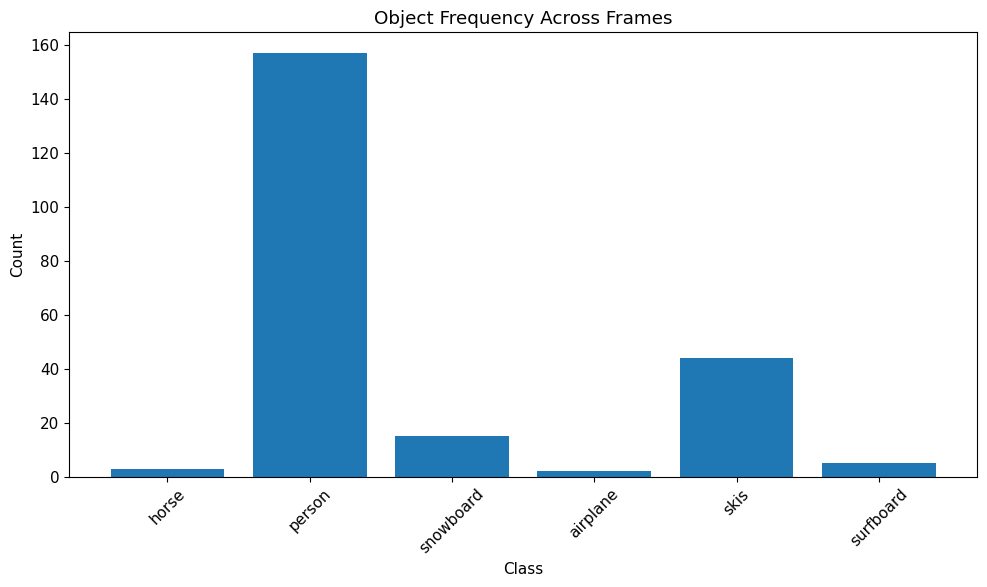

In [75]:
%matplotlib inline

classes, counts = zip(*class_counts.items())
plt.figure(figsize=(10, 6))
plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Object Frequency Across Frames')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\acer\cv_assignment\task1_outputs\object_frequency.png")
plt.show()